### 01. load and preprocess data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

## 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

## 2. Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ 
Í∞Å Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Í≤∞Ï∏° Ïú†Î¨¥Î•º ÌôïÏù∏ÌïòÍ≥†, Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ÏÑú Í∞ÑÎã®ÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≤†ÏäµÎãàÎã§.
### Í≤∞Ï∏°Ïπò ÌôïÏù∏
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò matrix Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

In [3]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [4]:
train['date'] = train['date'].apply(lambda i: i[2:6]).astype(int)  # intÎ°ú Î≥ÄÍ≤Ω
train.head()

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  1410  221900.0         3       1.00         1180      5650     1.0   
1   1  1502  180000.0         2       1.00          770     10000     1.0   
2   2  1502  510000.0         3       2.00         1680      8080     1.0   
3   3  1406  257500.0         3       2.25         1715      6819     2.0   
4   4  1501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view' 'sqft_basement' 'waterfront'
 'yr_renovated' 'yr_built' 'sqft_lot' 'long' 'sqft_lot15' 'id' 'condition'
 'zipcode' 'date']


<AxesSubplot:>

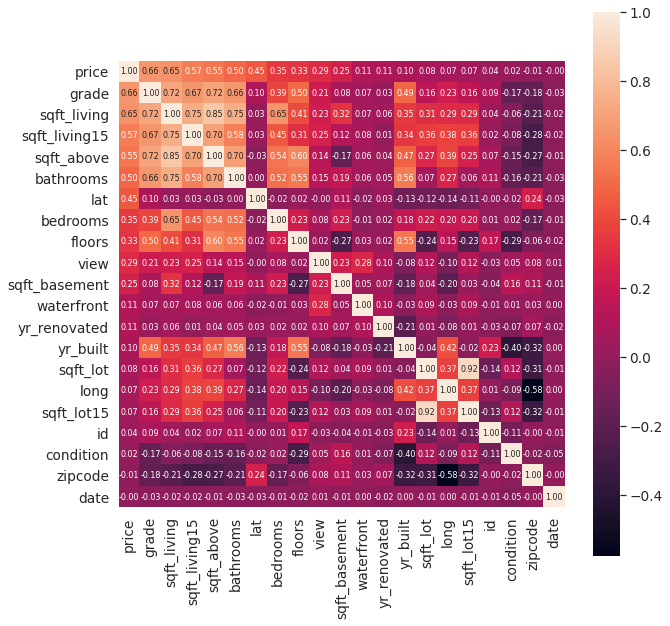

In [5]:
import scipy as sp

cor_abs = abs(train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=21,columns='price').index # ÏÉÅÏúÑ 10Í∞ú ÏßÄÏ†ï
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [6]:
train.zipcode[:10]

0    98178
1    98028
2    98074
3    98003
4    98198
5    98007
6    98115
7    98028
8    98074
9    98107
Name: zipcode, dtype: int64

In [7]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
del train['id']
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


Î™®Îì† Î≥ÄÏàòÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌòπÏãú Î™®Î•¥Îãà ÌôïÏã§ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.<br>

In [9]:
train.describe()

date      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  15035.000000  15035.000000  15035.000000  15035.000000  1.503500e+04   
mean    1438.545993      3.369139      2.115065   2083.790223  1.529697e+04   
std       44.252050      0.902721      0.767519    922.134087  4.261282e+04   
min     1405.000000      0.000000      0.000000    290.000000  5.200000e+02   
25%     1407.000000      3.000000      1.750000   1430.000000  5.027500e+03   
50%     1410.000000      3.000000      2.250000   1910.000000  7.620000e+03   
75%     1502.000000      4.000000      2.500000   2560.000000  1.069550e+04   
max     1505.000000     10.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  15035.000000  15035.000000  15035.000000  15035.000000  15035.000000   
mean       1.498071      0.007117      0.234253      3.406651      7.660725   
std        0.538522      0.084063      0.763376      0.646505      1.179803   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  15035.000000   15035.000000  15035.000000  15035.000000  15035.000000   
mean    1794.158164     289.632059   1971.100432     83.798936  98078.031726   
std      831.738609     440.663284     29.407612    400.398498     53.297815   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1570.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2230.000000     550.000000   1997.000000      0.000000  98117.000000   
max     9410.000000    4130.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  15035.000000  15035.000000   15035.000000   15035.000000  
mean      47.560721   -122.213677    1992.754772   12823.884935  
std        0.138164      0.141294     691.456442   27736.259787  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.472700   -122.328000    1490.000000    5100.000000  
50%       47.571900   -122.231000    1850.000000    7610.000000  
75%       47.678300   -122.126000    2360.000000   10076.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [10]:
test.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  15035  20141209T000000         3       2.25         2570      7242     2.0   
1  15036  20141209T000000         4       3.00         1960      5000     1.0   
2  15037  20140512T000000         4       4.50         5420    101930     1.0   
3  15038  20150415T000000         3       1.00         1780      7470     1.0   
4  15039  20150312T000000         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        2170            400      1951   
1           0     0          5      7        1050            910      1965   
2           0     0          3     11        3890           1530      2001   
3           0     0          3      7        1050            730      1960   
4           0     0          3      7        1890              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1991    98125  47.7210 -122.319           1690        7639  
1             0    98136  47.5208 -122.393           1360        5000  
2             0    98053  47.6561 -122.005           4760      101930  
3             0    98146  47.5123 -122.337           1780        8113  
4             0    98038  47.3684 -122.031           2390        7570

In [11]:
test['date'] = test['date'].apply(lambda i: i[2:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [12]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

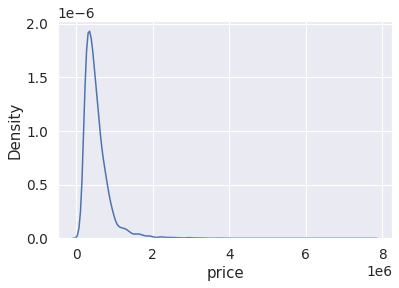

In [13]:
sns.kdeplot(y)
plt.show()

In [14]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

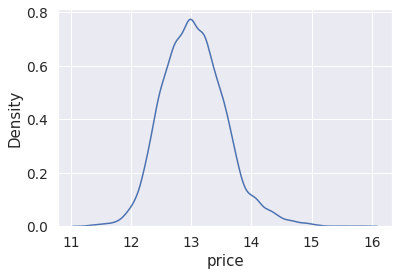

In [15]:
sns.kdeplot(y)
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))  # np.expml : ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶¨Í∏∞

In [19]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [20]:
random_state=1028

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [21]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [22]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 124131.19692815996,
 'XGBRegressor': 106615.63530702426,
 'LGBMRegressor': 107257.79913572696,
 'RandomForestRegressor': 134623.62574778864}

In [23]:
def get_scores(models, train, y):
    # ÎãµÏïà ÏûëÏÑ±
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

get_scores(models, train, y)

RMSE
RandomForestRegressor      134623.625748
GradientBoostingRegressor  124131.196928
LGBMRegressor              107257.799136
XGBRegressor               106615.635307

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 11], 
    'gamma': [0.5, 0.7, 0.3],
    'learning_rate': [0.029, 0.03],
    'boosting':["gbdt"],
    'num_iteration': [2500, 3000],
    "num_leaves" :[18, 19, 20],
    "objective" : ["regression"],
    "bagging_freq":[1],
    "bagging_fraction":[0.7, 0.8, 0.9]
}

In [25]:
model = LGBMRegressor(random_state=random_state)
# model = XGBRegressor(random_state=random_state)

In [26]:

grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 10.0min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 23.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 41.3min
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed: 56.5min finished


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] num_iterations is set=2500, num_iteration=2500 will be ignored. Current value: num_iterations=2500
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=1028), n_jobs=5,
             param_grid={'bagging_fraction': [0.7, 0.8, 0.9],
                         'bagging_freq': [1], 'boosting': ['gbdt'],
                         'gamma': [0.5, 0.7, 0.3],
                         'learning_rate': [0.029, 0.03], 'max_depth': [10, 11],
                         'n_estimators': [100], 'num_iteration': [2500, 3000],
                         'num_leaves': [18, 19, 20],
                         'objective': ['regression']},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
import sklearn
sklearn. __version__

'0.23.0'

In [28]:
grid_model.cv_results_

{'mean_fit_time': array([12.45055285, 12.82445197, 13.39688134, 14.44913478, 15.4830327 ,
        15.07937155, 12.5288868 , 13.37877402, 13.38842092, 14.83106146,
        15.57754655, 16.22409544, 12.74412603, 11.87893353, 13.21309652,
        14.87369294, 16.10164819, 15.86077824, 12.53938866, 12.38051419,
        13.69079981, 15.15671144, 15.25036492, 15.44930863, 12.58461127,
        12.79945316, 13.52883792, 15.00904565, 14.65369692, 15.53887892,
        13.10301514, 13.06687136, 13.31331248, 14.98654552, 14.83426118,
        15.82917686, 12.92733207, 12.36694717, 12.96824827, 15.7285233 ,
        14.8953548 , 15.31826959, 12.82677774, 12.79140124, 13.67902517,
        14.81763716, 14.99771805, 15.75653687, 12.94989924, 12.48110008,
        12.97753253, 14.94120836, 15.18238645, 16.15662622, 12.47650523,
        12.51783371, 13.76370916, 13.98728876, 15.51717119, 16.14693308,
        12.80452681, 13.32558317, 13.36595898, 14.1222455 , 15.33243551,
        15.81517301, 12.56864915, 

In [29]:
params = grid_model.cv_results_['params']
params

[{'bagging_fraction': 0.7,
  'bagging_freq': 1,
  'boosting': 'gbdt',
  'gamma': 0.5,
  'learning_rate': 0.029,
  'max_depth': 10,
  'n_estimators': 100,
  'num_iteration': 2500,
  'num_leaves': 18,
  'objective': 'regression'},
 {'bagging_fraction': 0.7,
  'bagging_freq': 1,
  'boosting': 'gbdt',
  'gamma': 0.5,
  'learning_rate': 0.029,
  'max_depth': 10,
  'n_estimators': 100,
  'num_iteration': 2500,
  'num_leaves': 19,
  'objective': 'regression'},
 {'bagging_fraction': 0.7,
  'bagging_freq': 1,
  'boosting': 'gbdt',
  'gamma': 0.5,
  'learning_rate': 0.029,
  'max_depth': 10,
  'n_estimators': 100,
  'num_iteration': 2500,
  'num_leaves': 20,
  'objective': 'regression'},
 {'bagging_fraction': 0.7,
  'bagging_freq': 1,
  'boosting': 'gbdt',
  'gamma': 0.5,
  'learning_rate': 0.029,
  'max_depth': 10,
  'n_estimators': 100,
  'num_iteration': 3000,
  'num_leaves': 18,
  'objective': 'regression'},
 {'bagging_fraction': 0.7,
  'bagging_freq': 1,
  'boosting': 'gbdt',
  'gamma': 0.5

In [30]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.02556187, -0.02553471, -0.02562671, -0.02569318, -0.02563172,
       -0.02573317, -0.02555029, -0.02555362, -0.02559161, -0.02565518,
       -0.02569174, -0.0257253 , -0.02548184, -0.02569079, -0.02562751,
       -0.02561452, -0.02582274, -0.02574161, -0.02542846, -0.02572903,
       -0.02563398, -0.02555656, -0.02585544, -0.02576457, -0.02556187,
       -0.02553471, -0.02562671, -0.02569318, -0.02563172, -0.02573317,
       -0.02555029, -0.02555362, -0.02559161, -0.02565518, -0.02569174,
       -0.0257253 , -0.02548184, -0.02569079, -0.02562751, -0.02561452,
       -0.02582274, -0.02574161, -0.02542846, -0.02572903, -0.02563398,
       -0.02555656, -0.02585544, -0.02576457, -0.02556187, -0.02553471,
       -0.02562671, -0.02569318, -0.02563172, -0.02573317, -0.02555029,
       -0.02555362, -0.02559161, -0.02565518, -0.02569174, -0.0257253 ,
       -0.02548184, -0.02569079, -0.02562751, -0.02561452, -0.02582274,
       -0.02574161, -0.02542846, -0.02572903, -0.02563398, -0.02

In [31]:
results = pd.DataFrame(params)
results['score'] = score

results

bagging_fraction  bagging_freq boosting  gamma  learning_rate  max_depth  \
0                 0.7             1     gbdt    0.5          0.029         10   
1                 0.7             1     gbdt    0.5          0.029         10   
2                 0.7             1     gbdt    0.5          0.029         10   
3                 0.7             1     gbdt    0.5          0.029         10   
4                 0.7             1     gbdt    0.5          0.029         10   
..                ...           ...      ...    ...            ...        ...   
211               0.9             1     gbdt    0.3          0.030         11   
212               0.9             1     gbdt    0.3          0.030         11   
213               0.9             1     gbdt    0.3          0.030         11   
214               0.9             1     gbdt    0.3          0.030         11   
215               0.9             1     gbdt    0.3          0.030         11   

     n_estimators  num_iteration  num_leaves   objective     score  
0             100           2500          18  regression -0.025562  
1             100           2500          19  regression -0.025535  
2             100           2500          20  regression -0.025627  
3             100           3000          18  regression -0.025693  
4             100           3000          19  regression -0.025632  
..            ...            ...         ...         ...       ...  
211           100           2500          19  regression -0.025479  
212           100           2500          20  regression -0.025492  
213           100           3000          18  regression -0.025554  
214           100           3000          19  regression -0.025585  
215           100           3000          20  regression -0.025574  

[216 rows x 11 columns]

In [32]:
grid_model.best_params_

{'bagging_fraction': 0.9,
 'bagging_freq': 1,
 'boosting': 'gbdt',
 'gamma': 0.5,
 'learning_rate': 0.029,
 'max_depth': 11,
 'n_estimators': 100,
 'num_iteration': 2500,
 'num_leaves': 20,
 'objective': 'regression'}

In [33]:
results['RMSLE'] = np.sqrt(-1 * results['score'])
results

bagging_fraction  bagging_freq boosting  gamma  learning_rate  max_depth  \
0                 0.7             1     gbdt    0.5          0.029         10   
1                 0.7             1     gbdt    0.5          0.029         10   
2                 0.7             1     gbdt    0.5          0.029         10   
3                 0.7             1     gbdt    0.5          0.029         10   
4                 0.7             1     gbdt    0.5          0.029         10   
..                ...           ...      ...    ...            ...        ...   
211               0.9             1     gbdt    0.3          0.030         11   
212               0.9             1     gbdt    0.3          0.030         11   
213               0.9             1     gbdt    0.3          0.030         11   
214               0.9             1     gbdt    0.3          0.030         11   
215               0.9             1     gbdt    0.3          0.030         11   

     n_estimators  num_iteration  num_leaves   objective     score     RMSLE  
0             100           2500          18  regression -0.025562  0.159881  
1             100           2500          19  regression -0.025535  0.159796  
2             100           2500          20  regression -0.025627  0.160083  
3             100           3000          18  regression -0.025693  0.160291  
4             100           3000          19  regression -0.025632  0.160099  
..            ...            ...         ...         ...       ...       ...  
211           100           2500          19  regression -0.025479  0.159621  
212           100           2500          20  regression -0.025492  0.159661  
213           100           3000          18  regression -0.025554  0.159857  
214           100           3000          19  regression -0.025585  0.159954  
215           100           3000          20  regression -0.025574  0.159917  

[216 rows x 12 columns]

In [34]:
results = results.sort_values('RMSLE')
results[:10]

bagging_fraction  bagging_freq boosting  gamma  learning_rate  max_depth  \
176               0.9             1     gbdt    0.7          0.029         11   
152               0.9             1     gbdt    0.5          0.029         11   
200               0.9             1     gbdt    0.3          0.029         11   
66                0.7             1     gbdt    0.3          0.030         11   
42                0.7             1     gbdt    0.7          0.030         11   
18                0.7             1     gbdt    0.5          0.030         11   
158               0.9             1     gbdt    0.5          0.030         10   
182               0.9             1     gbdt    0.7          0.030         10   
206               0.9             1     gbdt    0.3          0.030         10   
193               0.9             1     gbdt    0.3          0.029         10   

     n_estimators  num_iteration  num_leaves   objective     score     RMSLE  
176           100           2500          20  regression -0.025427  0.159458  
152           100           2500          20  regression -0.025427  0.159458  
200           100           2500          20  regression -0.025427  0.159458  
66            100           2500          18  regression -0.025428  0.159463  
42            100           2500          18  regression -0.025428  0.159463  
18            100           2500          18  regression -0.025428  0.159463  
158           100           2500          20  regression -0.025450  0.159531  
182           100           2500          20  regression -0.025450  0.159531  
206           100           2500          20  regression -0.025450  0.159531  
193           100           2500          19  regression -0.025453  0.159540

In [35]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [48]:
model = LGBMRegressor(random_state=random_state, n_estimators=100,
    max_depth=11, 
    gamma=0.7,
    learning_rate=0.029,
    boosting="gbdt",
    num_iteration=2500,
    objective="regression",
    num_leaves=20,
     bagging_freq=1,
    bagging_fraction=0.9)



In [38]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [52]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.160072')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.160072.csv


In [53]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [55]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.159458')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.159458.csv saved!


### id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§.<br>
date Î≥ÄÏàòÎäî Ïó∞ÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, Ïó∞ÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [ ]:
sub_id = data['id'][train_len:]
del data['id']
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(str)

### feature ÏôÄ priceÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏÜçÏóêÏÑú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûëÏùÄ featureÎ•º ÏÇ≠Ï†ú

In [ ]:
import scipy as sp

cor_abs = abs(train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=21,columns='price').index # ÏÉÅÏúÑ 10Í∞ú ÏßÄÏ†ï
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [ ]:
train.zipcode[:10]

In [ ]:
y = train['price']
del train['price']

print(train.columns)

In [ ]:
del train['id']
print(train.columns)

In [ ]:
train.describe()

In [ ]:
test.head()

In [ ]:
test['date'] = test['date'].apply(lambda i: i[2:6]).astype(int)

del test['id']

print(test.columns)

In [ ]:
y

### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎã§Î©¥ figsizeÏùò xÍ∞íÏùÑ Ï°∞Ï†àÌï¥ Î≥¥ÏÑ∏Ïöî. 

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.<br>
log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

print('Ïñçüí¢')

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

## 3. Î™®Îç∏ÎßÅ
### Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [ ]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))) 

In [ ]:
random_state=1028

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [ ]:
gboost.__class__.__name__

### Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('Ïñçüí¢')

In [ ]:
get_cv_score(models)

### Make Submission

ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî cross_val_score Ìï®ÏàòÍ∞Ä R<sup>2</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§.<br>
R<sup>2</sup> Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌëúÌòÑÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 3Í∞ú Ìä∏Î¶¨ Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.<br> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 3Í∞ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Average BlendingÏùÑ ÌÜµÌï¥ Ï†úÏ∂ú Í≤∞Í≥ºÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [ ]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('Ïñçüí¢')

In [ ]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

In [ ]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

In [ ]:
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

### ÎäêÎÇÄÏ†ê 